1. ChatGPT

Link: https://chatgpt.com/share/67412f52-c7f4-800d-a4d4-0e8c47e30615

Summary:
In this session, we discussed the difference between how a Classification Decision Tree and Multiple Linear Regression make predictions:

Classification Decision Tree predicts categorical outcomes (e.g., "spam" or "not spam") by recursively splitting data based on feature values, leading to a class label.
Multiple Linear Regression predicts continuous outcomes (e.g., price, quantity) by modeling a linear relationship between input features and the target variable.
We also noted the main differences in their prediction methods, outputs, and use cases: decision trees handle classification problems, while linear regression handles regression problems involving continuous data.

2.

Accuracy:

When it is addressed appropriately : General performance assessment, false positives, and false negatives are equally crucial.

Example: for spam email detection if the number of spam and non-spam emails are balanced then accuracy indicates in general how accurate the model is at identifying both classes.

Sensitivity:

When it is addressed appropriately: When it is expensive or dangerous to miss positive instances (false negatives).

Example: In breast cancer medical diagnosis tests, you need as high sensitivity as possible to catch every true positive case. False negative can be life-threatening if we miss a cancer case.

Specificity:

When it is addressed appropriately: particularly troublesome, or expensive false positives, contrary to sensitivity case.

Example : Fraud Detection system. You would not wanna identify a non-fraudulent transaction as fraudulent (false positive) incorrectly. By being specific, you can prevent customers from hindering genuine movement of shipments while identifying truly fraudulent behavior.

Precision:

When it is addressed appropriately: When false positives are costly(critical) and you want to make sure that positive predictions of the model can be trusted

Example: Credit Card Fraud Detection → When fraud is detected, it is important to track false positives(i.e. flagging proper transactions) because we obviously do not want customers being inconvenienced by our checking system→ Precision means that the labeled fraud cases actually are fraudulent.

2. ChatGPT

Link: https://chatgpt.com/share/674136c6-c658-800d-a371-ccda7f542216

Summary:

In this conversation, we discussed four key evaluation metrics: accuracy, sensitivity, specificity, and precision. Each metric was explained with a real-life example:

Accuracy is used in diagnostic tests to measure overall correct classifications.
Sensitivity is important in cancer screening to avoid missing true positives.
Specificity is crucial in rare disease tests to minimize false positives.
Precision is vital in spam email detection to avoid wrongly classifying legitimate emails as spam.
Each metric serves a specific purpose depending on the context, helping ensure the effectiveness and reliability of tests or systems.

3.

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

4.

Training set size: 260
Test set size: 65


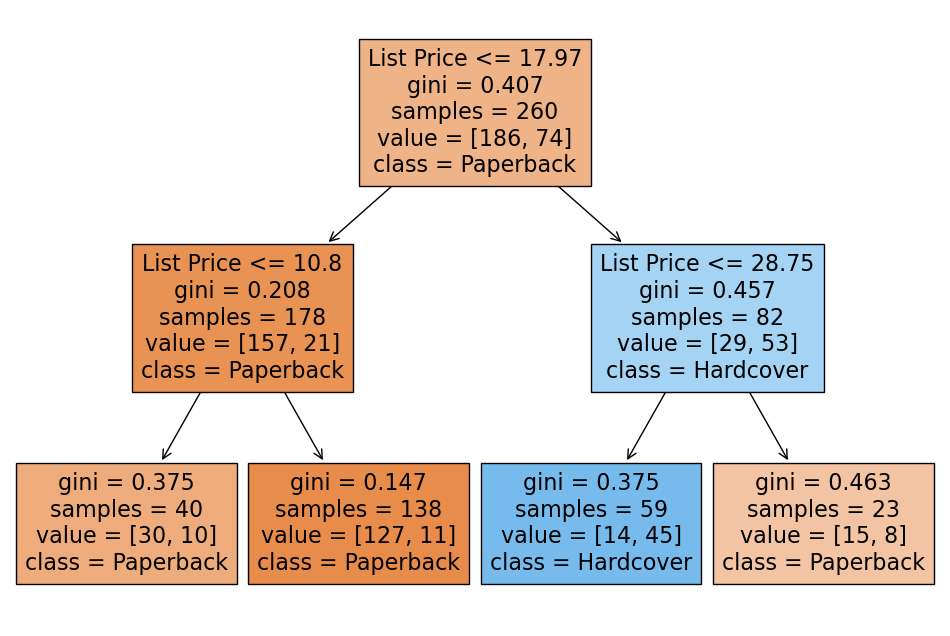

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Create target variable 'y' (Hard_or_Paper as binary: 1 for Hardcover, 0 for Paperback)
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

# Create feature variable 'X' (List Price)
X = ab[['List Price']]

# Split the dataset into 80% training and 20% testing (set a random seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print out the number of observations in each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Initialize the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'])
plt.show()

4.ChatGPT

Link:https://chatgpt.com/share/67413e1c-3014-800d-9054-4dad8fb40016

Summary:

In this session, we focused on training and evaluating a classification tree using the List Price variable to predict whether a book is hardcover or paperback. Key steps included:

Data Preparation:

Loaded the dataset from a URL, removed rows with missing values, and split the data into 80% training (ab_reduced_noNaN_train) and 20% testing (ab_reduced_noNaN_test).
Model Training:

Used DecisionTreeClassifier with max_depth=2 to train the model on the training set.
Evaluation:

Calculated the model's accuracy and displayed the confusion matrix.
Visualization:

Visualized the decision tree using tree.plot_tree for interpretability.
Let me know if you'd like any further refinements or explanations!

5.

Training set size: 260
Test set size: 65


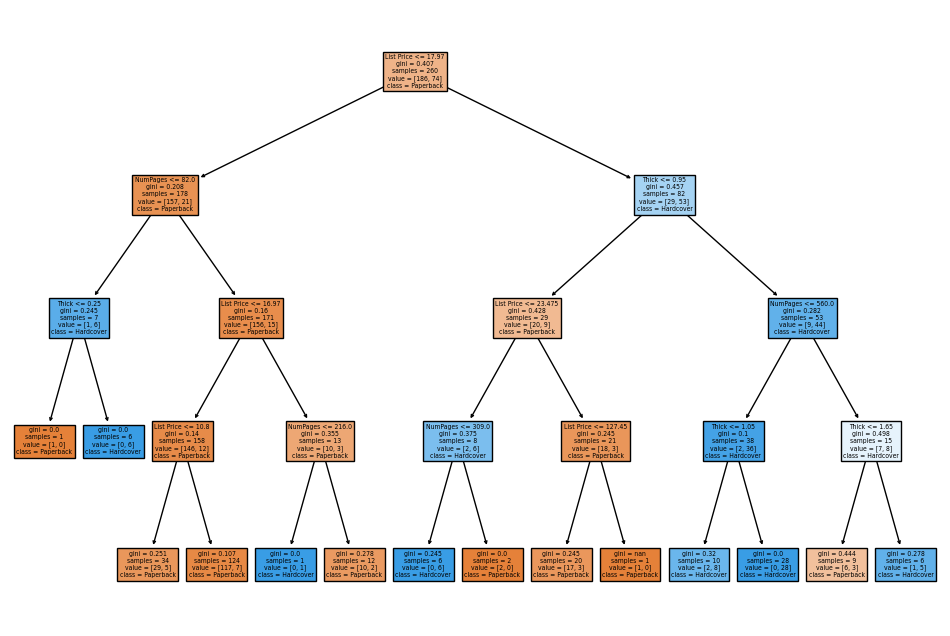

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Create target variable 'y' (Hard_or_Paper as binary: 1 for Hardcover, 0 for Paperback)
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

# Create feature variables 'X' (NumPages, Thick, List Price)
X = ab[['NumPages', 'Thick', 'List Price']]

# Split the dataset into 80% training and 20% testing (set a random seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print out the number of observations in each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Initialize the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'])
plt.show()


6.

Confusion Matrix for clf (max_depth=2):
[[47  3]
 [ 5 10]]
Sensitivity (clf): 0.6667
Specificity (clf): 0.9400
Accuracy (clf): 0.8769

Confusion Matrix for clf2 (max_depth=4):
[[44  6]
 [ 5 10]]
Sensitivity (clf2): 0.6667
Specificity (clf2): 0.8800
Accuracy (clf2): 0.8308


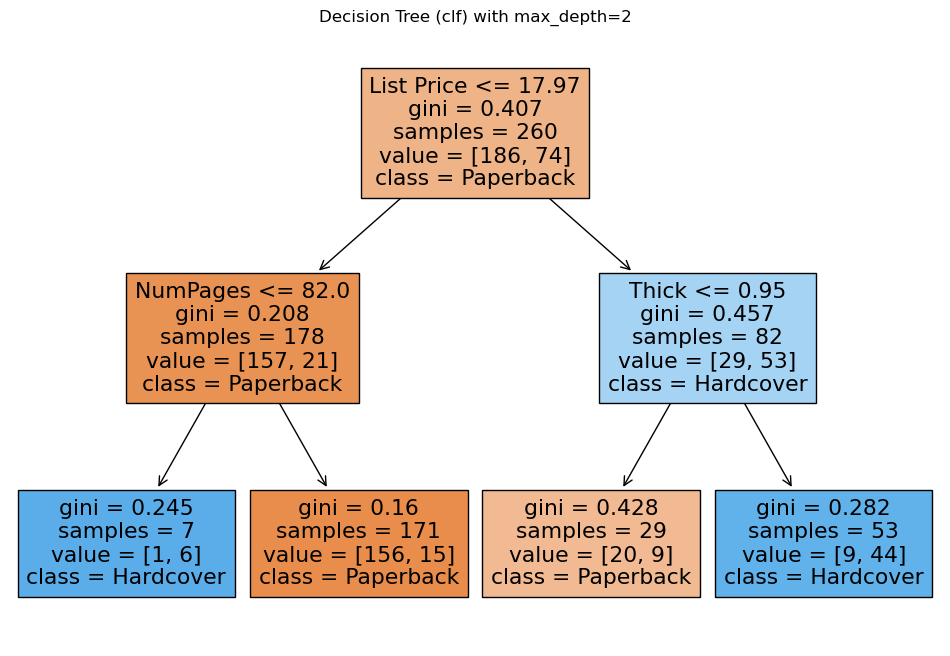

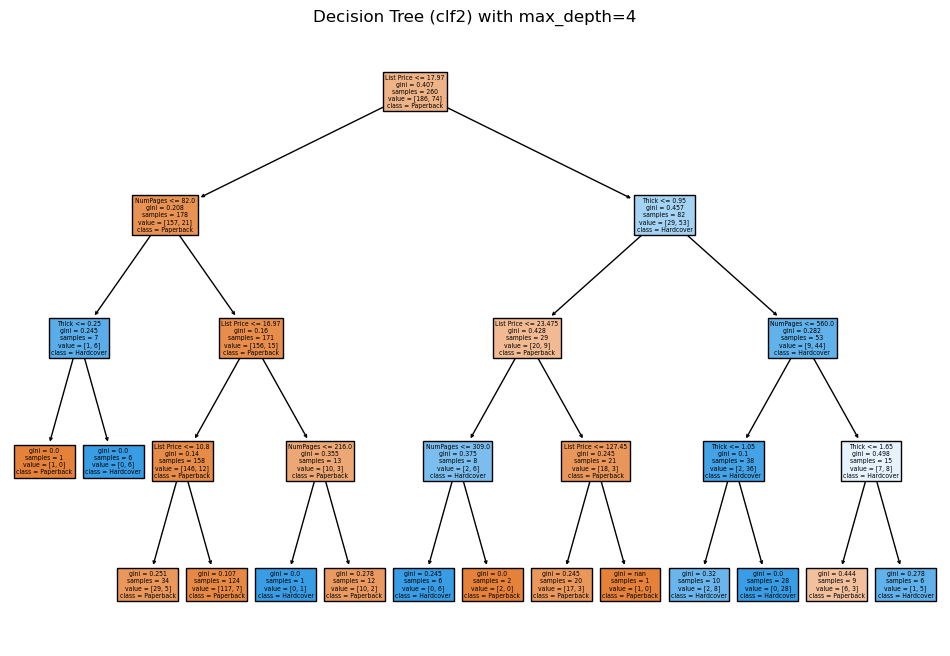

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Create target variable 'y' (Hard_or_Paper as binary: 1 for Hardcover, 0 for Paperback)
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

# Create feature variables 'X' (NumPages, Thick, List Price)
X = ab[['NumPages', 'Thick', 'List Price']]

# Split the dataset into 80% training and 20% testing (set a random seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with max_depth=2 (for clf) and max_depth=4 (for clf2)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the models
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# Predict the results for clf and clf2 using the test data
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Confusion Matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Sensitivity, Specificity, and Accuracy for clf
TP_clf = cm_clf[1, 1]
TN_clf = cm_clf[0, 0]
FP_clf = cm_clf[0, 1]
FN_clf = cm_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Print results
print("Confusion Matrix for clf (max_depth=2):")
print(cm_clf)
print(f"Sensitivity (clf): {sensitivity_clf:.4f}")
print(f"Specificity (clf): {specificity_clf:.4f}")
print(f"Accuracy (clf): {accuracy_clf:.4f}\n")

print("Confusion Matrix for clf2 (max_depth=4):")
print(cm_clf2)
print(f"Sensitivity (clf2): {sensitivity_clf2:.4f}")
print(f"Specificity (clf2): {specificity_clf2:.4f}")
print(f"Accuracy (clf2): {accuracy_clf2:.4f}")

# Visualize the Decision Tree for clf (max_depth=2)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'])
plt.title("Decision Tree (clf) with max_depth=2")
plt.show()

# Visualize the Decision Tree for clf2 (max_depth=4)
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'])
plt.title("Decision Tree (clf2) with max_depth=4")
plt.show()

Note for no Grade(Ignore this part please, Leo.):

what is a "positive" and what is a "negative"
how to read an sklearn confusion matrix
what leads to TP, TN, FP, and FN
whether y_true or y_pred go first in the confusion_matrix function

1. ポジティブ (Positive) とネガティブ (Negative)
ポジティブ: 分類で「関心のあるクラス」または「1」と定義されるクラス。
例: ハードカバー本 (H, 1)。
ネガティブ: 「その他のクラス」または「0」と定義されるクラス。
例: ペーパーバック本 (P, 0)。

2. sklearn の混同行列 (Confusion Matrix) の読み方
混同行列は次のような形です：

lua
Copy code
                予測
               0         1
    実際  -----------------
      0      TN        FP
      1      FN        TP
行: 実際のクラス（ラベル）。

列: モデルの予測。

TN (True Negative): 実際が0で、予測も0（正しい予測）。

FP (False Positive): 実際が0なのに、予測が1（誤った予測）。

FN (False Negative): 実際が1なのに、予測が0（誤った予測）。

TP (True Positive): 実際が1で、予測も1（正しい予測）。

3. TP, TN, FP, FN が発生する理由
TP (正解のポジティブ): ポジティブな例を正しく予測。
例: 実際がハードカバー (1)、予測もハードカバー (1)。
TN (正解のネガティブ): ネガティブな例を正しく予測。
例: 実際がペーパーバック (0)、予測もペーパーバック (0)。
FP (誤ったポジティブ): ネガティブをポジティブと誤予測。
例: 実際がペーパーバック (0)、予測がハードカバー (1)。
FN (誤ったネガティブ): ポジティブをネガティブと誤予測。
例: 実際がハードカバー (1)、予測がペーパーバック (0)。

4. confusion_matrix 関数では y_true と y_pred の順番
順番は y_true が先、y_pred が後。
python
Copy code
confusion_matrix(y_true, y_pred)
y_true: 実際のラベル。
y_pred: モデルが予測したラベル。

6.ChatGPT

Link:https://chatgpt.com/share/67413e1c-3014-800d-9054-4dad8fb4001

Summary:
Short Summary:
We created confusion matrices for two decision tree classifiers (clf with max_depth=2 and clf2 with max_depth=4) using an 80/20 training/test split. We calculated sensitivity, specificity, and accuracy for both models and visualized their decision trees. The results provided insights into the performance of each model, showing how they classify books as hardcover or paperback based on features like NumPages, Thick, and List Price.

7.

The first confusion matrix was only for predicting 'List Price' and the second for a combination of features which were: NumPages, Thick, List Price. The second model has more features and thus is getting a closer look to each hardcover vs paperback (an idea which should improve prediction) and its likely able to do Much better predictions as it has more information on how to differentiate ) therefore lead lesser misclassifications.

The confusion matrices for clf and clf2 (where we make use of the combination of features NumPages, Thick andList Price for training) are improved because they provide a richer set of features to learn over which allows the model to make better decisions. These models also get scored on an independent test set which will provide some measure of their generalization ability, in contrast to the models evaluated on training data as part of the confusion matrices above.